In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import math

from describe import loadData, trainDataFilePath

data = loadData(trainDataFilePath())
if data is None:
    exit(1)

# Remove index from data, as it's not a usefull feature
df = data.drop(columns=['Index', 'index'], errors='ignore')

> **Histogram :** Which Hogwarts course has a homogeneous score distribution between all four houses?

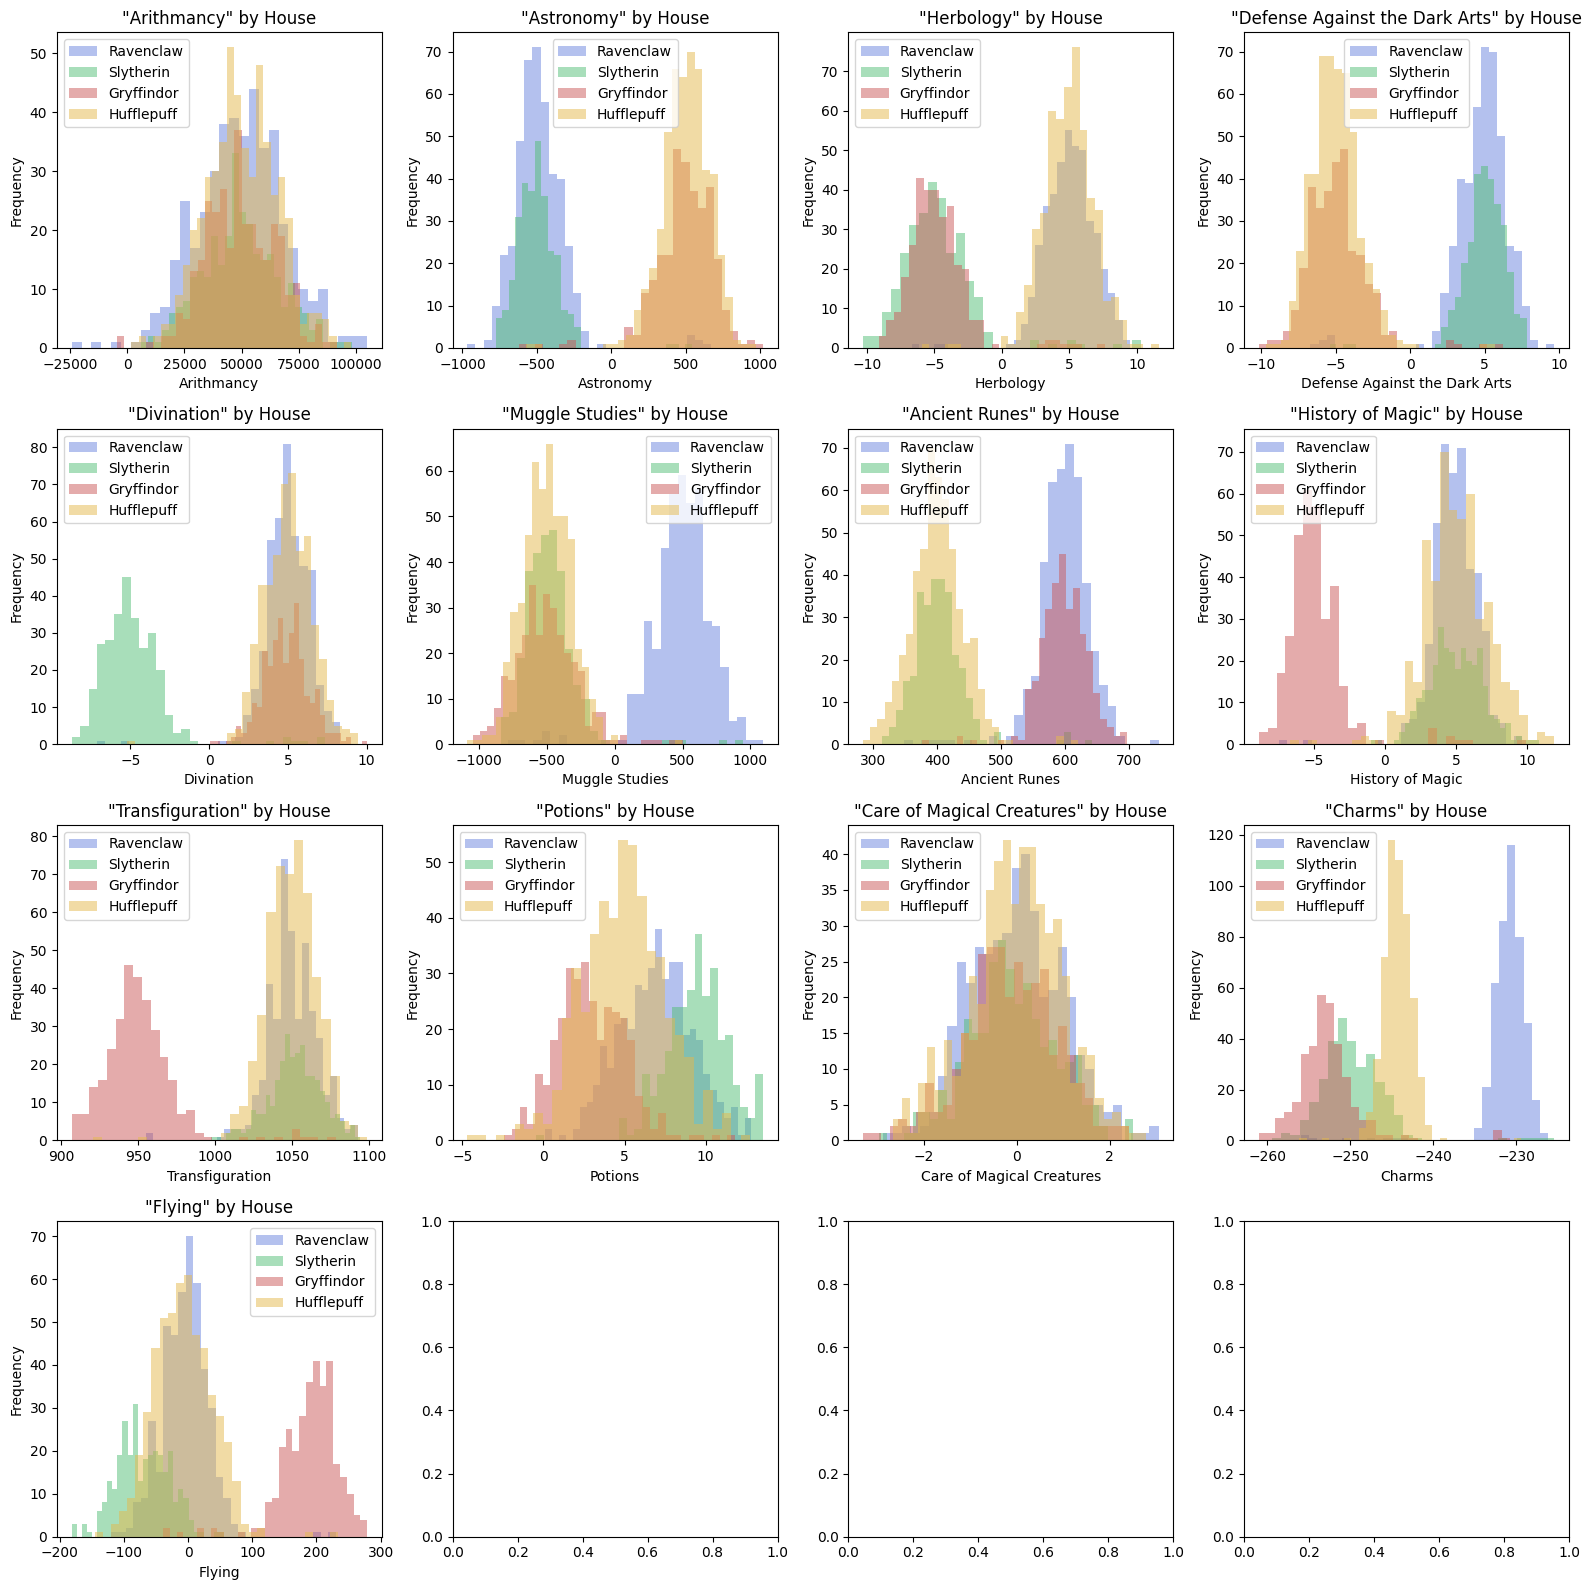

In [14]:
numeric_cols = df.select_dtypes(include='number').columns
num_plots = len(numeric_cols)
all_houses = df["Hogwarts House"].dropna().unique()

house_color_map = {
    'Gryffindor': "#CB5959",
    'Hufflepuff': "#E5B94C",
    'Ravenclaw':  '#6A85DF',
    'Slytherin':  "#52BE76"
}

cols = math.ceil(math.sqrt(num_plots))
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4), squeeze=False)

for i, column in enumerate(numeric_cols):
    ax = axes[i // cols][i % cols]
    for house in all_houses:
        house_data = df[df["Hogwarts House"] == house][column].dropna()
        ax.hist(house_data, bins=30, alpha=0.5, label=house, color=house_color_map[house])

    ax.set_title(f'"{column}" by House')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()